<h1 style="text-align:center;margin:50px 0">Model Evaluation</h1>
<h2 style="text-align:center;margin:30px 0;color:blue">For <b>Logistic Regression</b> model on <i>Titanic Dataset</i></h2>

### Import required modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Read dataset

In [112]:
df = pd.read_csv('../datasets/titanic.csv')

### Preprocessing

In [113]:
df['male'] = df['Sex'] == 'male'

### Features and target selection¶

In [114]:
X = df.drop(columns=["Survived", "Sex"], axis=1).values
y = df["Survived"].values

### Regression

In [9]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

## Evaluation

### 1. Accuracy, Precision, Recall & F1 Score

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
y_pred = model.predict(X)

In [34]:
print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))

accuracy: 0.8049605411499436
precision: 0.7734627831715211
recall: 0.6988304093567251
f1 score: 0.7342549923195084


### 2. Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(y, y_pred))

[[475  70]
 [103 239]]


### 3. Training and Testing 

<p style="color:green">To simulate making predictions on <b>new unseen data</b>, we can break our dataset into a <b>training set</b> and a <b>test set</b>. </p>

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [59]:
print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

whole dataset: (887, 6) (887,)
training set: (665, 6) (665,)
test set: (222, 6) (222,)


<p style="background-color:yellow;color:blue;padding:5px 10px;font-size:15px"> Evaluating the model using splitted dataset. </p>

In [60]:
y_pred = model.predict(X_test)

In [61]:
# print("accuracy:", model.score(X_test, y_test))
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.8333333333333334
precision: 0.835820895522388
recall: 0.6829268292682927
f1 score: 0.7516778523489933


### 4. Sensitivity & Specificity

In [62]:
from sklearn.metrics import recall_score, precision_recall_fscore_support

In [63]:
sensitivity_score = recall_score

def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

df = pd.read_csv('../datasets/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df.drop(columns=["Survived", "Sex"], axis=1).values
y = df["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [66]:
print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

sensitivity: 0.3875
specificity: 0.971830985915493


### 5. Adjusting the Logistic Regression Threshold

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<p style="color:blue">A threshold of 0.75 means we need to be more confident in order to make a positive prediction.</br>This results in fewer positive predictions and more negative predictions.</br>The default value is 0.5 .</p>

In [72]:
y_pred = model.predict_proba(X_test)[:, 1] > 0.75

In [73]:
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

precision: 1.0
recall: 0.15853658536585366


### 6. The ROC Curve

In [76]:
from sklearn.metrics import roc_curve

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [78]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred_proba = model.predict_proba(X_test)

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

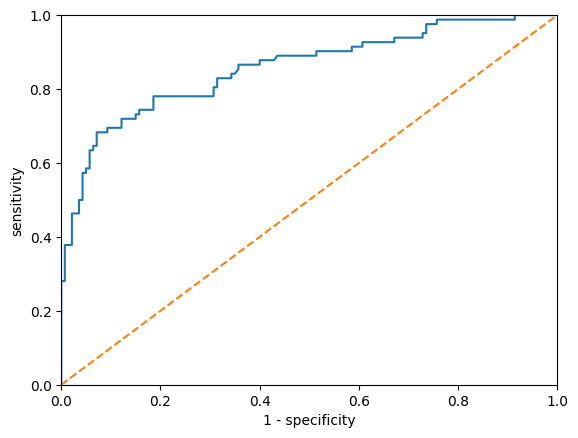

In [83]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

### 7. Area Under the Curve (AUC)

<p style="color:blue"> Now we will compare two models using <b>AUC Score</b>.</p>

In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

<p style="color:blue"> model1 with 6 features.</p>

In [90]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model 1 AUC score: 0.8572299651567944


<p style="color:blue"> model2 with 2 features. </p>

In [99]:
model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.8390679442508711


<p style="color:blue"> We see that the AUC score of model1 is higher. </p>

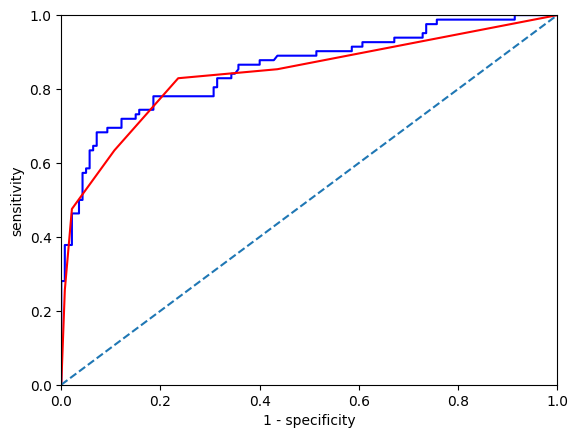

In [100]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2[:,1])
plt.plot(fpr1, tpr1, color="b")
plt.plot(fpr2, tpr2, color="r")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

### 8. K-fold Cross Validation

<p style="color:blue"> Instead of doing a single train/test split, we’ll split our data into a training set and test set multiple times. </p>

In [123]:
from sklearn.model_selection import KFold

In [124]:
df = pd.read_csv('../datasets/titanic.csv')
df['male'] = df['Sex'] == 'male'

In [125]:
X = df.drop(columns=["Survived", "Sex"], axis=1).values
y = df["Survived"].values

In [130]:
scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print("Scores:", scores)
print("Scores average:", np.mean(scores))

Scores: [0.7696629213483146, 0.797752808988764, 0.8192090395480226, 0.7909604519774012, 0.8022598870056498]
Scores average: 0.7959690217736304


In [131]:
final_model = LogisticRegression()
final_model.fit(X, y)

LogisticRegression()

### 9. Model Comparison

In [134]:
df = pd.read_csv('../datasets/titanic.csv')
df['male'] = df['Sex'] == 'male'

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

<p style="color:blue"> Now we compare models on different training sets based on features selection. </p>

In [135]:
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

In [138]:
def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

Logistic Regression with all features
accuracy: 0.7993525042848981
precision: 0.7646046581134531
recall: 0.693445699641785
f1 score: 0.7256241748251824

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7924903193042596
precision: 0.7483755679657319
recall: 0.7049768725629129
f1 score: 0.7234626482691393

Logistic Regression with Fare & Age features
accuracy: 0.6504475338030851
precision: 0.6288571428571428
recall: 0.2291562771771293
f1 score: 0.3305373533964029


<p style="color:blue"> We can train the best model now. </p>

In [ ]:
model = LogisticRegression()
model.fit(X1, y)

<p style="color:blue"> Now we can test it. </p>

In [140]:
print(model.predict([[3, False, 25, 0, 1, 2]]))

[1]
